# Customer Churn Prediction Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

# menampilkan jumlah baris dan kolom dataset
print('Jumlah kolom dan baris dataset')
print(df_load.shape)

# menampilkan 5 data teratas
print('\nTampilan 5 data teratas')
print(df_load.head())

# menampilkan jumlah ID unik
print('\njumlah ID unik')
print(df_load.customerID.nunique())

Jumlah kolom dan baris dataset
(6950, 13)

Tampilan 5 data teratas
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No      

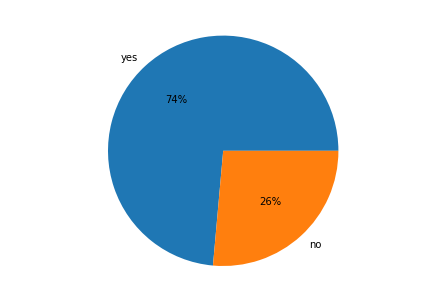

In [2]:
# pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['yes', 'no']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels,  autopct='%.0f%%')
plt.show()

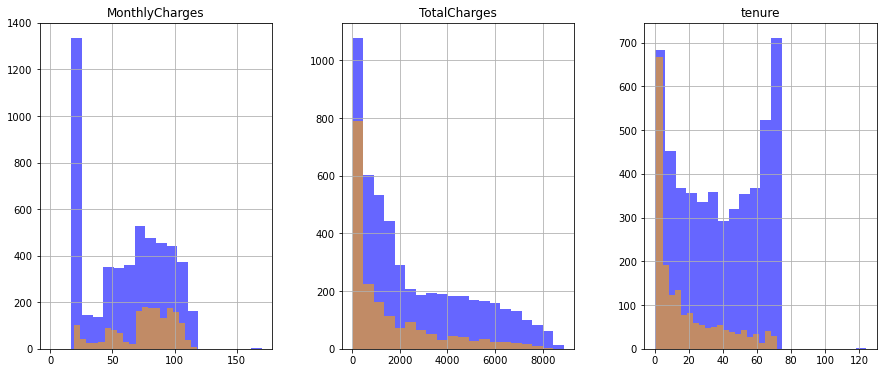

In [3]:
numerical_features = ['MonthlyCharges', 'TotalCharges', 'tenure']

fig, ax = plt.subplots(1, 3, figsize=(15,6))

df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.6, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.6,  ax=ax)
plt.show()

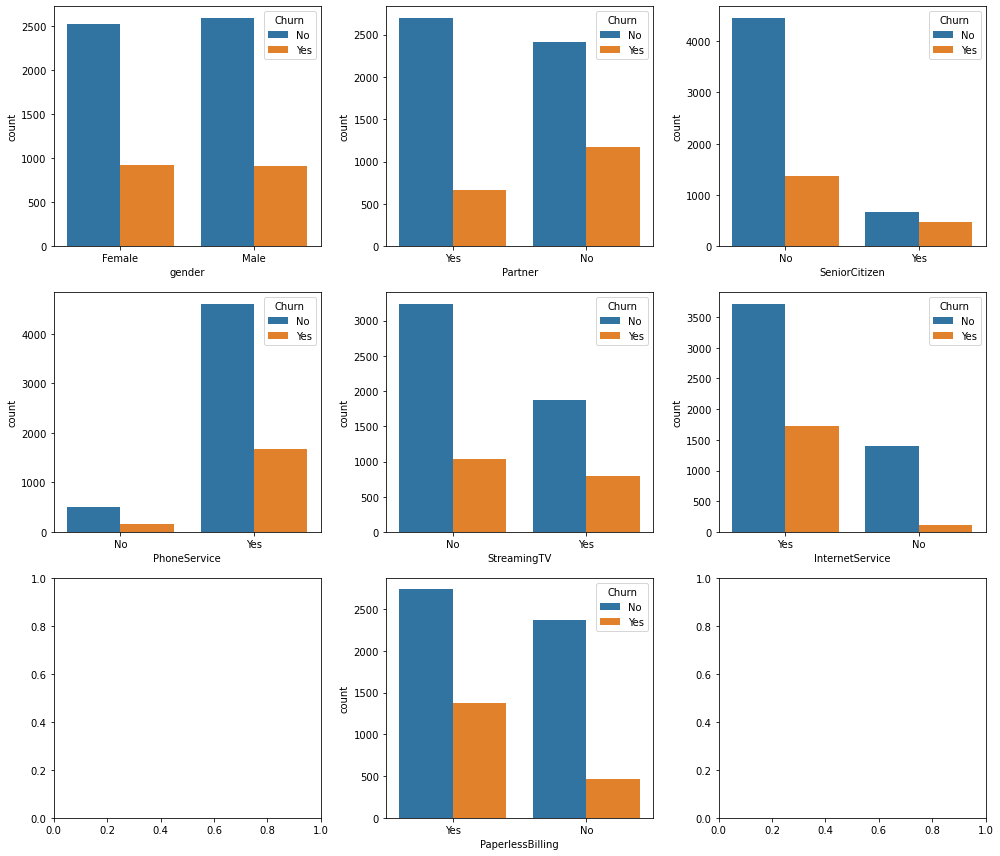

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

In [5]:
# removing column UpdetedAt dan custommmerID

cleaned_df = df_load.drop(['UpdatedAt', 'customerID'], axis=1)

print(cleaned_df)

      gender SeniorCitizen Partner  tenure PhoneService StreamingTV  \
0     Female            No     Yes       1           No          No   
1       Male            No     Yes      60          Yes          No   
2       Male            No      No       5          Yes         Yes   
3     Female            No     Yes      72          Yes         Yes   
4     Female            No     Yes      56          Yes         Yes   
...      ...           ...     ...     ...          ...         ...   
6945    Male            No      No       1          Yes          No   
6946  Female           Yes      No       1          Yes          No   
6947  Female            No      No       1          Yes         Yes   
6948  Female            No     Yes      72          Yes         Yes   
6949    Male            No      No      64          Yes          No   

     InternetService PaperlessBilling  MonthlyCharges  TotalCharges Churn  
0                Yes              Yes           29.85         29.85    

In [6]:
#Convert all the non-numeric columns to numerical data types
from sklearn.preprocessing import LabelEncoder

for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_13648/3192575984.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


In [7]:
# Splitting Dataset
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=24)

print('Jumlah baris dan kolom dari x_train adalah : ', X_train.shape, ',sedangkan jumlah baris dan kolom dari y_train adalah: ', y_train.shape)
print('Prosentasi churn di data training adalah :')
print(y_train.value_counts(normalize=True))

print('\nJumlah baris dan kolom dari x_test adalah : ',X_test.shape, ',sedangkan jumlah baris dan kolom dari y_test adalah :',y_test.shape)
print('Prosentasi churn di data testing adalah :')
print(y_test.value_counts(normalize=True))


Jumlah baris dan kolom dari x_train adalah :  (4865, 10) ,sedangkan jumlah baris dan kolom dari y_train adalah:  (4865,)
Prosentasi churn di data training adalah :
0    0.734635
1    0.265365
Name: Churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah :  (2085, 10) ,sedangkan jumlah baris dan kolom dari y_test adalah : (2085,)
Prosentasi churn di data testing adalah :
0    0.738609
1    0.261391
Name: Churn, dtype: float64


## Logistic Regression Model

In [8]:
# Logistic Regression model
log_model = LogisticRegression().fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: ',log_model)

Model Logistic Regression yang terbentuk adalah:  LogisticRegression()


In [9]:
# predict data training
y_train_pred = log_model.predict(X_train)

print('Classification report training model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification report training model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3574
           1       0.65      0.49      0.56      1291

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.79      0.78      4865



<Figure size 432x288 with 0 Axes>

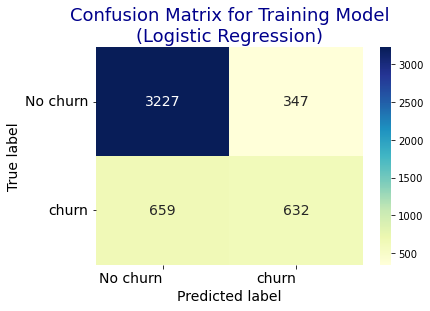

In [10]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'churn'), ('No churn', 'churn'))

# plot confusion matrix
plt.figure()
# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [11]:
# predict data testing
y_test_pred = log_model.predict(X_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1540
           1       0.63      0.48      0.55       545

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.70      2085
weighted avg       0.78      0.79      0.78      2085



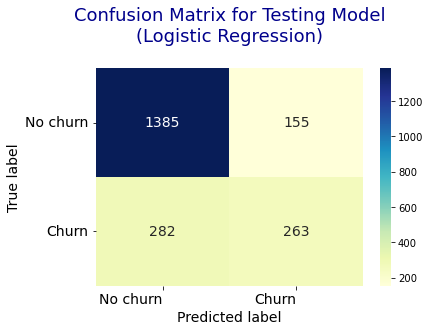

In [12]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## Random Forest Classifier Model

In [13]:
# random forest classifier model
rdf_model = RandomForestClassifier().fit(X_train, y_train)
print('Model Random Forest Classifier yang Terbentuk adalah : \n', rdf_model)

Model Random Forest Classifier yang Terbentuk adalah : 
 RandomForestClassifier()


In [14]:
# predict data training
y_train_pred = rdf_model.predict(X_train)
print('Classification report training model (Random Forest) : ')
print(classification_report(y_train, y_train_pred))

Classification report training model (Random Forest) : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3574
           1       0.99      0.99      0.99      1291

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



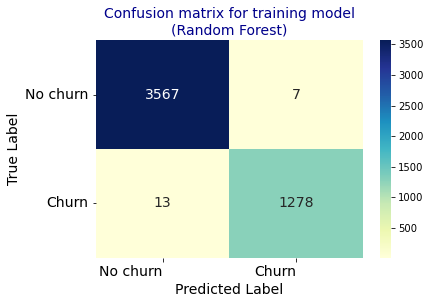

In [15]:
# form confusion matrix as a dataframe
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion matrix for training model\n(Random Forest)', fontsize=14, color='darkblue')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [16]:
# predict data testing
y_test_pred = rdf_model.predict(X_test)
print('Classification report testing model (Random Forest)')
print(classification_report(y_test, y_test_pred))

Classification report testing model (Random Forest)
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1540
           1       0.60      0.46      0.52       545

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.77      0.78      0.77      2085



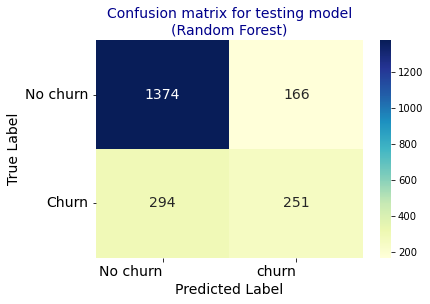

In [17]:
# form confusion matrix as a datarame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion matrix for testing model\n(Random Forest)', fontsize=14, color='darkblue')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

## Gradient Boosting Classifier

In [18]:
gbt_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [19]:
# predict training
y_train_pred = gbt_model.predict(X_train)
print('Classification report for training model (Gradient Boosting Classifier)')
print(classification_report(y_train, y_train_pred))

Classification report for training model (Gradient Boosting Classifier)
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3574
           1       0.70      0.54      0.61      1291

    accuracy                           0.82      4865
   macro avg       0.77      0.73      0.75      4865
weighted avg       0.81      0.82      0.81      4865



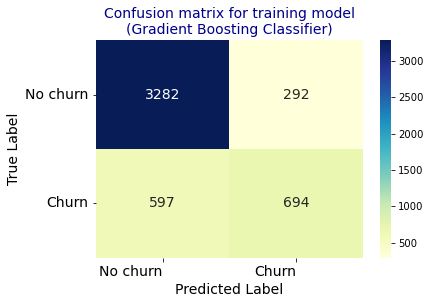

In [20]:
# form confusion matrix as a dataframe
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion matrix for training model\n(Gradient Boosting Classifier)', fontsize=14, color='darkblue')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [21]:
# predict testing
y_test_pred = gbt_model.predict(X_test)
print('Classification report for testing model (Gradient Boosting Classifier)')
print(classification_report(y_test, y_test_pred))

Classification report for testing model (Gradient Boosting Classifier)
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1540
           1       0.65      0.50      0.56       545

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.72      2085
weighted avg       0.79      0.80      0.79      2085



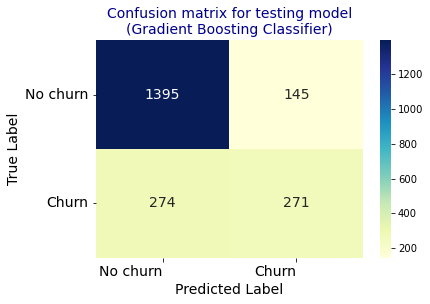

In [22]:
# Form confusion matrix as a dataframe
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion matrix for testing model\n(Gradient Boosting Classifier)', fontsize=14, color='darkblue')
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [23]:
#Save Model
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))